In [13]:
import concurrent.futures
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as npr
import time

In [18]:
from MetropolisHastings import MetropolisHastings
from ConsensusMH import ConsensusMH
from FlyMH import FlyMH

In [16]:
npr.seed(1)
N = 100000
z = np.zeros(N)
dataType = "Gaussian"
#dataType = "logNormal"
if dataType == "Gaussian":
    x = npr.randn(N)
elif dataType == "logNormal":
    x = np.log_normal(0,1)

# We store the mean and std deviation for later reference, they are also the MAP and MLE estimates in this case.
realMean = np.mean(x)
realStd = np.std(x)
print(f"Mean of x = {realMean}")
print(f"Std of x = {realStd}")

Mean of x = 0.005253028489682668
Std of x = 0.9983292735417362
[ 1.62434536 -0.61175641 -0.52817175 ...  0.08122531  0.34404618
 -0.74755625]


In [21]:

map = np.array([realMean,realStd])
vanill = MetropolisHastings(x)

start_time = time.time()
run_vanill = vanill.run(10000, map, x)
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.6f} seconds")

sns.jointplot(x=run_vanill[:,0],y=run_vanill[:,1])

TypeError: 'int' object is not callable

In [6]:
# class FlyMH(MetropolisHastings):

#   def run(self, T, resample_fraction):
#       z = torch.zeros(self.N * resample_fraction)
#       for i in range(len(z)):
#         n = torch.randint(low=1, high=self.N+1, size=(1,))
#         z[i] =



#       S = torch.zeros(T, self.theta.size(0))
#       S[0,:] = self.theta
#       for i in range(T-1):
#         theta_new = self.get_theta_new(S[i,:])
#         log_alpha = self.get_log_alpha(S[i,:],theta_new)
#         log_u = torch.log(torch.rand(1))/N
#         if log_u < log_alpha:
#           S[i+1,:] = theta_new
#         else:
#           S[i+1,:] = S[i,:]

#       return S

Execution time: 10.447057 seconds


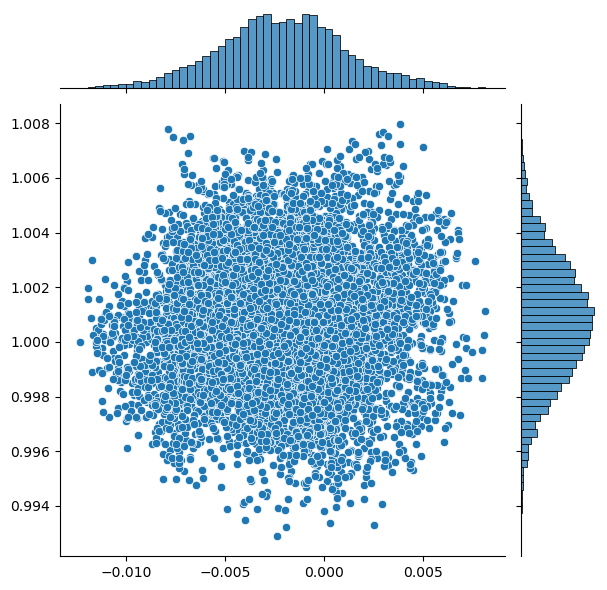

In [9]:
cons = ConsensusMH(dataset = x, num_batches=4)

start_time = time.time()
S = cons.run(10000, map)
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.6f} seconds")
sns.jointplot(x=S[:,0],y=S[:,1])